In [1]:

import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot



In [2]:
data = pd.read_csv("/home/cl-4/Final_DS.csv")


In [3]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()


(11371, 2)


,Label,Tweet
0,T,�Fight those who do not believe in Allah nor t...
1,F,@WagiheElhalouat: URGENT ATTENTAT SUICIDE A L...
2,F,@asadowaisi: Why Owaisi offered legal help to...
3,T,Coconut Temple in Denmark https://twitter.com/...
4,F,@_com: Supersize Iranian ‘#Hulk’ signs up to ...


In [4]:
data = data[['Label', 'Tweet']]


In [5]:
data.to_csv("URL.csv")


In [6]:
#data['Label'].value_counts().sort_index().plot.bar()


In [7]:
#data['Tweet'].str.len().plot.hist()


In [8]:
#clean
data['Tweet'].apply(lambda x: x.lower()) 
data['Tweet'] = data['Tweet'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['Tweet'].head()

0    Fight those who do not believe in Allah nor th...
1     WagiheElhalouat URGENT ATTENTAT SUICIDE A LA ...
2     asadowaisi Why Owaisi offered legal help to I...
3    Coconut Temple in Denmark httpstwittercomaccou...
4     _com Supersize Iranian Hulk signs up to help ...
Name: Tweet, dtype: object

In [9]:
#tokenzation
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['Tweet'].values)

X = tokenizer.texts_to_sequences(data['Tweet'].values)
X = pad_sequences(X) 
X[:5]


array([[   0,    0,    0, ...,   19,  261, 1209],
       [   0,    0,    0, ...,  975, 1240,  611],
       [   0,    0,    0, ..., 2003,  275,  368],
       [   0,    0,    0, ...,    0,    4,  139],
       [   0,    0,    0, ..., 1622,  288, 2251]], dtype=int32)

In [10]:

model = Sequential()
model.add(Embedding(5000, 196, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(196, return_sequences=True, dropout=0.3, recurrent_dropout=0))
model.add(LSTM(196, dropout=0.3, recurrent_dropout=0))
model.add(Dense(2, activation='softmax'))


2021-12-02 12:31:11.537152: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-02 12:31:11.953194: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20454 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:42:00.0, compute capability: 8.6


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','msle'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2151, 196)         980000    
_________________________________________________________________
dropout (Dropout)            (None, 2151, 196)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 2151, 196)         308112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               308112    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 1,596,618
Trainable params: 1,596,618
Non-trainable params: 0
_________________________________________________________________


In [12]:
y = pd.get_dummies(data['Label']).values
[print(data['Label'][i], y[i]) for i in range(0,5)]

T [0 1]
F [1 0]
F [1 0]
T [0 1]
F [1 0]


[None, None, None, None, None]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [14]:
batch_size = 32
epochs = 10

history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

#268-lstm & r_a=0 & 0.3

Epoch 1/10


2021-12-02 12:31:12.618027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-02 12:31:15.235444: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-12-02 12:31:16.098676: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


178/178 [==============================] - 28s 139ms/step - loss: 0.2224 - accuracy: 0.9022 - msle: 0.0346
Epoch 2/10
178/178 [==============================] - 25s 139ms/step - loss: 0.0598 - accuracy: 0.9787 - msle: 0.0080
Epoch 3/10
178/178 [==============================] - 25s 139ms/step - loss: 0.0303 - accuracy: 0.9889 - msle: 0.0041
Epoch 4/10
178/178 [==============================] - 25s 139ms/step - loss: 0.0234 - accuracy: 0.9926 - msle: 0.0028
Epoch 5/10
178/178 [==============================] - 25s 141ms/step - loss: 0.0187 - accuracy: 0.9947 - msle: 0.0022
Epoch 6/10
178/178 [==============================] - 25s 139ms/step - loss: 0.1926 - accuracy: 0.9372 - msle: 0.0237
Epoch 7/10
178/178 [==============================] - 25s 139ms/step - loss: 0.0944 - accuracy: 0.9638 - msle: 0.0130
Epoch 8/10
178/178 [==============================] - 25s 140ms/step - loss: 0.0298 - accuracy: 0.9887 - msle: 0.0042
Epoch 9/10
178/178 [==============================] - 25s 138ms/ste

In [23]:
model.save('Manthan_SA_V.03- 196LSTM')

2021-12-02 12:37:26.379268: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Manthan_SA_V.03- 196LSTM/assets


INFO:tensorflow:Assets written to: Manthan_SA_V.03- 196LSTM/assets


In [41]:
testing=["I am going to bomb taj mahal and kill people and have thier blood on my hands"]

In [42]:
predictions = model.predict(testing)

#[print(data['Tweet'][i], predictions[i], y_test[i]) for i in range(2000, 2005)]

2021-12-02 12:58:00.034655: W tensorflow/core/framework/op_kernel.cc:1669] OP_REQUIRES failed at cast_op.cc:121 : Unimplemented: Cast string to float is not supported


UnimplementedError: 2 root error(s) found.
  (0) Unimplemented:  Cast string to float is not supported
	 [[node sequential/Cast (defined at tmp/ipykernel_298967/420840731.py:1) ]]
  (1) Cancelled:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_29278]

Function call stack:
predict_function -> predict_function


In [17]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==1:
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 2796
Negative predictions: 2890
Real positive: 2856
Real negative: 2830


In [21]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
178/178 [==============================] - 11s 63ms/step - loss: 0.1573 - accuracy: 0.9638 - msle: 0.0153
test loss, test acc: [0.15729613602161407, 0.9637706875801086, 0.015306379646062851]


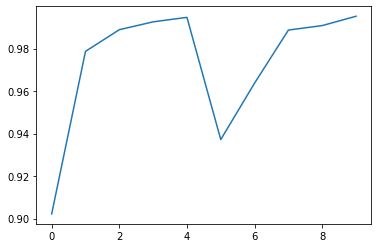

In [22]:
pyplot.plot(history.history['accuracy'])
pyplot.show()

In [ ]:
def predict_sentiment(text):
    tweets_text = text

    encoded_review = tokenizer.encode_plus(
    tweets_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=False,
    return_attention_mask=True,
    return_tensors='pt',
    )

    input_ids = pad_sequences(encoded_review['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    input_ids = input_ids.astype(dtype = 'int64')
    input_ids = torch.tensor(input_ids) 

    attention_mask = pad_sequences(encoded_review['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    attention_mask = attention_mask.astype(dtype = 'int64')
    attention_mask = torch.tensor(attention_mask) 

    input_ids = input_ids.reshape(-1,512).to(device)
    attention_mask = attention_mask.to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    outputs = outputs[0][0].cpu().detach()

    probs = F.softmax(outputs, dim=-1).cpu().detach().numpy().tolist()
    _, prediction = torch.max(outputs, dim =-1)

    print("Not Terrorits:", probs[1])
    print("Terrorits:", probs[0])
    print(f'tweets text: {tweets_text}')
    print(f'Sentiment  : {class_names[prediction]}')
    print()

In [36]:
#user created fun
punctuation='!'
test_review = "I am going to bomb taj mahal and kill people and have thier blood on my hands"